> __Purpose:__ This NB tests a given Local model and visualizes the train/test curves to investigate over/under-fitting

In [1]:
import pandas as pd
#import numpy as np
#import random
#np.random.seed(42) 
from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import KFold
#from sklearn.cross_decomposition import CCA
#from sklearn.decomposition import PCA

from moments_engr import *
from agglo_model_clust import *
from DNN_FT_funcs import *
from DNN_AMC_funcs import *
from hyperparam_tuned_configs import *
from full_study_funcs import *



In [2]:
MODEL_STR = "DynamicMomonaNet"
MY_CONFIG = DynamicMomonaNet_config
NUM_LOCAL_MODELS = 15
NUM_LOCAL_TRAIN_GESTURE_SAMPLES = 3

expdef_df = load_expdef_gestures(apply_hc_feateng=False)
all_participants = list(expdef_df['Participant'].unique())


In [3]:
# Choosing NUM_LOCAL_MODELS somewhat arbitrarily, don't need to look at all 32 results... save some computation ig
# Setting num_gesture_training_trials=NUM_LOCAL_TRAIN_GESTURE_SAMPLES so that this replicates finetuning data used for local
# num_gesture_ft_trials should not be used I don't think, not in main_training_pipeline anyways
data_splits = make_data_split(expdef_df, num_gesture_training_trials=NUM_LOCAL_TRAIN_GESTURE_SAMPLES, num_gesture_ft_trials=NUM_LOCAL_TRAIN_GESTURE_SAMPLES, num_train_users=NUM_LOCAL_MODELS)


In [4]:
user_dict = prepare_data_for_local_models(data_splits, MODEL_STR, MY_CONFIG)


In [6]:

res_dict_lst = []
for p_idx, pid in enumerate(list(set(data_splits['train']['participant_ids']))):
    print(f"Training local model for {pid} ({p_idx}/{NUM_LOCAL_MODELS})")

    # TODO: BUG: This just trains the same generic model over and over again, doesn't depend on pid...
    #res_dict_lst.append(main_training_pipeline(data_splits, all_participants, data_splits['cross_subject_test']['participant_ids'], MODEL_STR, MY_CONFIG))

    res_dict_lst.append(main_training_pipeline(data_splits=None, all_participants=all_participants, 
                                               test_participants=data_splits['cross_subject_test']['participant_ids'],  # Really, I dont even care about cross subject testing for local... can I turn this off...
                                               model_type=MODEL_STR, config=MY_CONFIG, 
                                               train_intra_cross_loaders=user_dict[pid]))



Training local model for P127 (0/15)
Training local model for P102 (1/15)
Training local model for P123 (2/15)
Training local model for P006 (3/15)
Training local model for P121 (4/15)
Training local model for P011 (5/15)
Training local model for P124 (6/15)
Training local model for P125 (7/15)
Training local model for P110 (8/15)
Training local model for P107 (9/15)
Training local model for P004 (10/15)
Training local model for P103 (11/15)
Training local model for P118 (12/15)
Training local model for P128 (13/15)
Training local model for P106 (14/15)


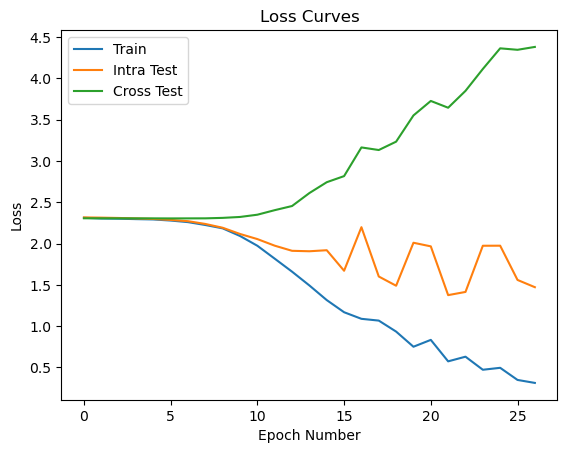

In [7]:
user_res_dict = res_dict_lst[0]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


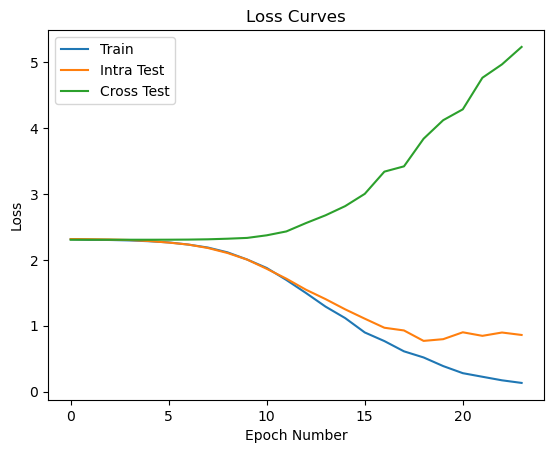

In [8]:
user_res_dict = res_dict_lst[1]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


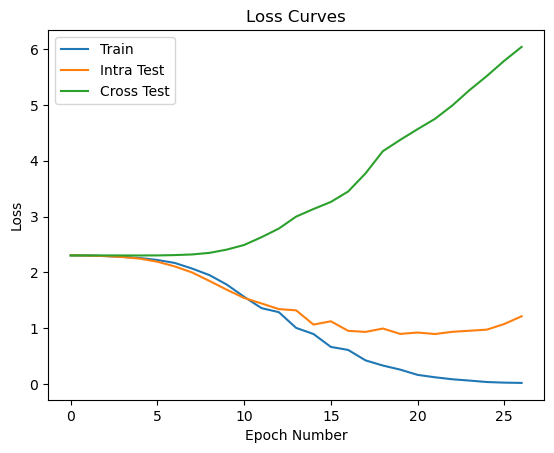

In [9]:
user_res_dict = res_dict_lst[2]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Rerun (No Early Stopping)
> Bug: editing MY_CONFIG appears to have turned it off in MY_CONFIG but the results still only show 10-12 epochs (implying earlystopping was till on)

In [10]:
MY_CONFIG = copy.deepcopy(DynamicMomonaNet_config)
# Turning off early stopping!
MY_CONFIG['num_epochs'] = 50
MY_CONFIG['use_earlystopping'] = False


In [11]:
MY_CONFIG

{'num_channels': 16,
 'sequence_length': 64,
 'time_steps': None,
 'conv_layers': [(32, 5, 1), (64, 3, 1), (128, 2, 1)],
 'pooling_layers': [True, False, False, False],
 'use_dense_cnn_lstm': True,
 'lstm_hidden_size': 16,
 'lstm_num_layers': 1,
 'fc_layers': [128, 64],
 'num_classes': 10,
 'batch_size': 16,
 'lstm_dropout': 0.8,
 'cnn_dropout': 0.0,
 'dense_cnnlstm_dropout': 0.0,
 'fc_dropout': 0.0,
 'learning_rate': 0.001,
 'num_epochs': 50,
 'optimizer': 'adam',
 'weight_decay': 0.0001,
 'ft_learning_rate': 0.01,
 'num_ft_epochs': 500,
 'ft_weight_decay': 0.0001,
 'ft_batch_size': 1,
 'use_earlystopping': False,
 'results_save_dir': 'C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\results\\20250203_1505',
 'models_save_dir': 'C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\models\\20250203_1505',
 'perf_log_dir': 'C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\results\\performance_logs',
 'timestamp': '20250203_1505',
 'verbose': False,
 'log_each_pid_results': False,
 

In [12]:
len(res_dict_lst)

15

In [13]:

res_dict_lst = []
for p_idx, pid in enumerate(list(set(data_splits['train']['participant_ids']))):
    print(f"Training local model for {pid} ({p_idx}/{NUM_LOCAL_MODELS})")

    res_dict_lst.append(main_training_pipeline(data_splits=None, all_participants=all_participants, 
                                               test_participants=data_splits['cross_subject_test']['participant_ids'], 
                                               model_type=MODEL_STR, config=MY_CONFIG, 
                                               train_intra_cross_loaders=user_dict[pid]))



Training local model for P127 (0/15)
Training local model for P102 (1/15)
Training local model for P123 (2/15)
Training local model for P006 (3/15)
Training local model for P121 (4/15)
Training local model for P011 (5/15)
Training local model for P124 (6/15)
Training local model for P125 (7/15)
Training local model for P110 (8/15)
Training local model for P107 (9/15)
Training local model for P004 (10/15)
Training local model for P103 (11/15)
Training local model for P118 (12/15)
Training local model for P128 (13/15)
Training local model for P106 (14/15)


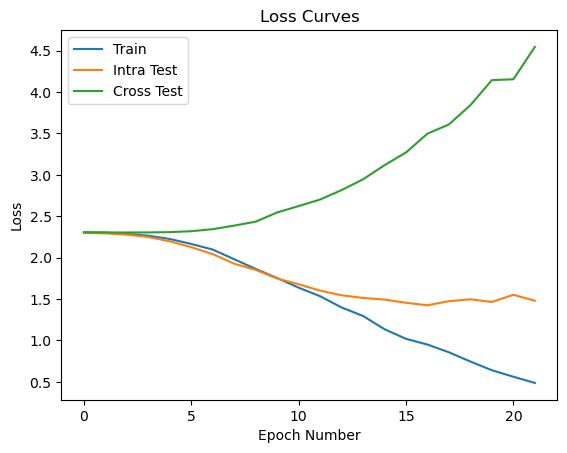

In [14]:
user_res_dict = res_dict_lst[0]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


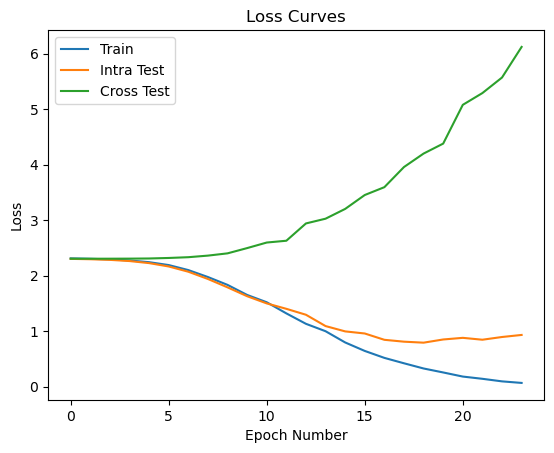

In [15]:
user_res_dict = res_dict_lst[1]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


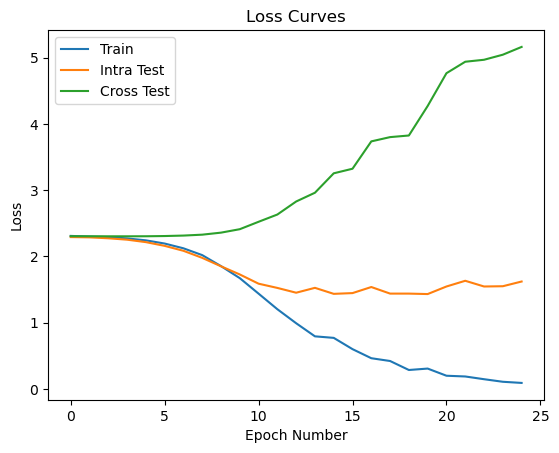

In [16]:
user_res_dict = res_dict_lst[2]

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


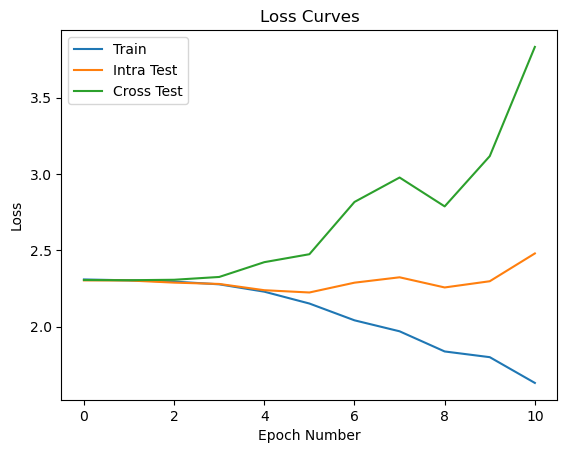

In [17]:
user_res_dict = main_training_pipeline(data_splits, all_participants, data_splits['cross_subject_test']['participant_ids'], MODEL_STR, MY_CONFIG)

plt.plot(user_res_dict['train_loss_log'], label="Train")
plt.plot(user_res_dict['intra_test_loss_log'], label="Intra Test")
plt.plot(user_res_dict['cross_test_loss_log'], label="Cross Test")
plt.title("Loss Curves")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [18]:
# Save the data to a file
## TODO: Ensure this is saving to the correct place
## TODO: This is the saving for the AMC, not for local.
# Need to save the results from local tho...
#print(f'{MY_CONFIG["results_save_dir"]}\\{MY_CONFIG["timestamp"]}')
#print()
#with open(f'{MY_CONFIG["results_save_dir"]}\\{MY_CONFIG["timestamp"]}_{MODEL_STR}_agglo_merge_res.pkl', 'wb') as f:
#    pickle.dump(merge_log, f)
#    pickle.dump(intra_cluster_performance, f)
#    pickle.dump(cross_cluster_performance, f)
#    pickle.dump(nested_clus_model_dict, f)
#print("Data has been saved successfully!")